In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [141]:
ellissamplefinaldf=pd.read_csv('/Users/alexanderferrer/Documents/GitHub/UP229_Ellis/ellis_sample_finaldf.csv')

In [142]:
datadf=ellissamplefinaldf[[
                    'median_income_2019','median_rent_2019','median_value_2019','part_black_2019',
                    'part_latx_2019', 'part_white_2019', 'part_female_head_2019', 'part_hh_kids_2019',
                    'part_rented_2019', 'part_unemployed_2019', 'part_poverty_2019', 'part_vacant_2019',
                    'part_college_2019','change_rent_14_19', 'change_value_14_19', 'change_part_rented_14_19',
                    'change_part_white_14_19', 'change_part_black_14_19', 'change_part_latx_14_19',
                    'change_part_college_14_19', 'change_part_unemployed_14_19', 'change_part_hh_kids_14_19',
                    'change_part_female_head_14_19', 'change_part_poverty_14_19', 'change_part_vacant_14_19',
                    'dist_to_nearest_highrenttract', 'dist_to_nearest_highchangetract','pctbuilt','pctsold','time_to_file']]

In [143]:
cols_to_standardize = [col for col in datadf.columns if '_iscorp' not in col]

In [144]:
cols_to_plot=cols_to_plot = [col for col in datadf.columns]

In [145]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datadf[cols_to_standardize])

df_scaled = pd.DataFrame(scaler.transform(datadf[cols_to_standardize]), columns=cols_to_standardize, index=datadf.index)

In [146]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_scaled)

In [147]:
df_scaled['cluster_id'] = kmeans.labels_

In [148]:
df_scaled

,median_income_2019,median_rent_2019,median_value_2019,part_black_2019,part_latx_2019,part_white_2019,part_female_head_2019,part_hh_kids_2019,part_rented_2019,part_unemployed_2019,...,change_part_hh_kids_14_19,change_part_female_head_14_19,change_part_poverty_14_19,change_part_vacant_14_19,dist_to_nearest_highrenttract,dist_to_nearest_highchangetract,pctbuilt,pctsold,time_to_file,cluster_id
0,0.492687,0.786052,-0.341276,-0.329210,-0.903930,0.862418,0.433664,0.568195,-1.241318,0.504391,...,0.320569,-0.274137,0.776163,-0.323624,-0.891526,-0.485112,-0.707697,0.229093,-0.361086,1
1,0.492687,0.786052,-0.341276,-0.329210,-0.903930,0.862418,0.433664,0.568195,-1.241318,0.504391,...,0.320569,-0.274137,0.776163,-0.323624,-0.891526,-0.459464,-0.707697,0.229093,-0.353450,1
2,-0.637325,-0.483582,-1.158781,-0.538484,1.090612,-0.769482,-0.913287,1.157324,0.577894,-0.946389,...,0.521068,-0.605058,-0.783062,-0.634768,-0.628613,0.390737,-0.396503,-0.698560,-0.410993,3
3,-0.123947,-0.370779,-0.788257,-0.667357,0.419420,0.021009,-0.829424,1.652799,-1.157168,-0.068627,...,3.840455,-0.432548,1.180002,-1.793189,-0.264579,-0.545534,-0.676317,-0.006984,-0.330542,3
4,-0.637325,-0.483582,-1.158781,-0.538484,1.090612,-0.769482,-0.913287,1.157324,0.577894,-0.946389,...,0.521068,-0.605058,-0.783062,-0.634768,-0.492669,0.027089,-0.396503,-0.698560,-0.472354,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,1.646218,-0.041970,-0.628341,-0.531459,0.368202,0.114096,-1.669331,0.779282,-3.015944,0.601604,...,1.670204,-3.065071,0.181637,0.231886,-0.381276,0.261808,-0.738781,-0.313359,-0.420538,1
922,0.261168,-0.248375,-0.650746,-0.626330,0.124223,0.575970,-0.037591,0.376224,-1.060429,0.190267,...,0.415821,-0.471871,-0.067696,0.297444,-0.216060,0.255461,-0.738781,-0.777373,-0.503717,3
923,1.487613,2.156487,0.090582,0.190493,-1.467123,0.970295,0.712074,-0.305342,-0.648701,0.271828,...,1.945218,-0.344555,-0.538721,-0.447556,-0.891526,-0.813346,-0.331078,0.196608,1.949639,1
924,-1.215088,-1.208400,-1.213673,-0.214362,1.107421,-0.950524,-0.800003,-0.220742,1.350593,-0.666003,...,-0.022333,-0.170577,0.477460,-0.763316,-0.458573,0.098934,-0.163325,0.131987,-0.435810,3


In [149]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


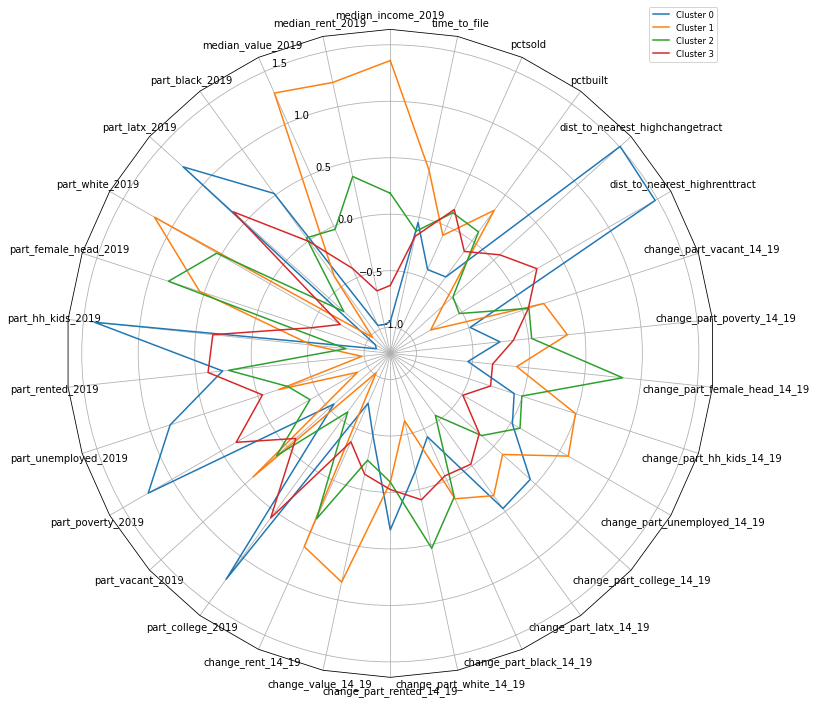

In [150]:
# adapting the example
%matplotlib inline

# let's put this in a function so we can call it easily again
def radar_plot(kmeans, df_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in df_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(15, 15),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.5, hspace=0.25, top=0.85, bottom=0.25)


    #ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    #        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
    #                     horizontalalignment='center', verticalalignment='center')
    #        for d, color in zip(case_data, colors):
    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.5, fontsize='small')

radar_plot(kmeans, df_scaled)


In [116]:
ellissamplefinaldf['cluster_id']=df_scaled['cluster_id']

In [117]:
df_scaled.cluster_id.value_counts()

1    284
0    187
2    161
3    158
4    136
Name: cluster_id, dtype: int64

In [125]:
summarystatsclusterdf=ellissamplefinaldf.groupby('cluster_id')['units_total','sqft_total','yearbuilt_avg',
                       'median_income_2019','median_rent_2019','median_value_2019','part_black_2019',
                       'part_latx_2019', 'part_white_2019', 'part_female_head_2019', 'part_hh_kids_2019',
                       'part_rented_2019', 'part_unemployed_2019', 'part_poverty_2019', 'part_vacant_2019',
                       'part_college_2019','median_income_2014','median_rent_2014','median_value_2014','part_black_2014',
                       'part_latx_2014', 'part_white_2014', 'part_female_head_2014', 'part_hh_kids_2014',
                        'part_rented_2014', 'part_unemployed_2014', 'part_poverty_2014', 'part_vacant_2014',
                       'part_college_2014','change_rent_14_19', 'change_value_14_19', 'change_part_rented_14_19',
                       'change_part_white_14_19', 'change_part_black_14_19', 'change_part_latx_14_19',
                       'change_part_college_14_19', 'change_part_unemployed_14_19', 'change_part_hh_kids_14_19',
                       'change_part_female_head_14_19', 'change_part_poverty_14_19', 'change_part_vacant_14_19',
                       'dist_to_nearest_highrenttract', 'dist_to_nearest_highchangetract','pctbuilt','pctsold'].agg(["count","mean","std"])

<ipython-input-125-6f8d01157353>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summarystatsclusterdf=ellissamplefinaldf.groupby('cluster_id')['units_total','sqft_total','yearbuilt_avg',


In [126]:
summarystatsclusterdf.to_csv('/Users/alexanderferrer/Documents/GitHub/UP229_Ellis/clustsummarystatdf.csv')

In [124]:
ellissamplefinaldf.groupby('cluster_id').landlord_iscorp.value_counts()

cluster_id  landlord_iscorp
0           1.0                103
            0.0                 84
1           1.0                157
            0.0                127
2           1.0                 83
            0.0                 78
3           1.0                 83
            0.0                 75
4           1.0                 70
            0.0                 66
Name: landlord_iscorp, dtype: int64

In [39]:
ax = sns.pairplot(df_scaled, hue='cluster_id')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd5fe9d1d30> (for post_execute):


KeyboardInterrupt: 